In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path1='/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv'
features = ['Gender','Age','Hypertension','heart disease','smoking_history','BMI','HbA1c_level','blood_glucose_level']
target= ['class']            
df = pd.read_csv(path1,header=None,names=features + ['target'])
df=df.drop([0],axis=0)
display(df)
#df.head()

<ipython-input-2-2fab8c7571a8>:16: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path1,header=None,names=features + ['target'])


,Gender,Age,Hypertension,heart disease,smoking_history,BMI,HbA1c_level,blood_glucose_level,target
1,Female,80,0,1,never,25.19,6.6,140,0
2,Female,54,0,0,No Info,27.32,6.6,80,0
3,Male,28,0,0,never,27.32,5.7,158,0
4,Female,36,0,0,current,23.45,5,155,0
5,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99996,Female,80.0,0,0,No Info,27.32,6.2,90,0
99997,Female,2.0,0,0,No Info,17.37,6.5,100,0
99998,Male,66.0,0,0,former,27.83,5.7,155,0
99999,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Gender']))}
df['Gender'] = df['Gender'].map(class_mapping)
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['smoking_history']))}
df['smoking_history'] = df['smoking_history'].map(class_mapping)
df

,Gender,Age,Hypertension,heart disease,smoking_history,BMI,HbA1c_level,blood_glucose_level,target
1,0,80,0,1,4,25.19,6.6,140,0
2,0,54,0,0,0,27.32,6.6,80,0
3,1,28,0,0,4,27.32,5.7,158,0
4,0,36,0,0,1,23.45,5,155,0
5,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99996,0,80.0,0,0,0,27.32,6.2,90,0
99997,0,2.0,0,0,0,17.37,6.5,100,0
99998,1,66.0,0,0,3,27.83,5.7,155,0
99999,0,24.0,0,0,4,35.42,4.0,100,0


In [4]:
X = df.iloc[0:,0:-1].values
X=X.astype('float64')
print(X)
y = df.iloc[0:,-1].values
y=y.astype('int64')
print (y)
print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, test_size=0.05)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]
[0 0 0 ... 0 0 0]
Class labels: [0 1]


In [5]:
np.set_printoptions(precision=3)
mean_vecs = []
for label in range(0,2):
 mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
 print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 0: [-0.012 -0.079 -0.06  -0.052 -0.029 -0.065 -0.123 -0.128]

MV 1: [-0.012 -0.079 -0.06  -0.052 -0.029 -0.065 -0.123 -0.128]



In [6]:
d = 8 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
 class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
 row, mv = row.reshape(d, 1), mv.reshape(d, 1)
 class_scatter += (row - mv).dot((row - mv).T)
 S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 8x8


In [7]:
d = 8 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(0, 2), mean_vecs):
 class_scatter = np.cov(X_train_std[y_train==label].T)
 S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 8x8


In [8]:
mean_overall = np.mean(X_train_std, axis=0)
d = 8 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
 n = X_train_std[y_train == i + 1, :].shape[0]
 mean_vec = mean_vec.reshape(d, 1) # make column vector
 mean_overall = mean_overall.reshape(d, 1)
 S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 8x8


In [9]:
eigen_vals, eigen_vecs =np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [11]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
 print(eigen_val[0])

Eigenvalues in descending order:

169.20737445374363
2.842170943040401e-14
1.6141359456129766e-14
1.448979187943472e-14
3.2871711507632643e-15
6.244216341400815e-16
4.909978845365319e-16
4.909978845365319e-16


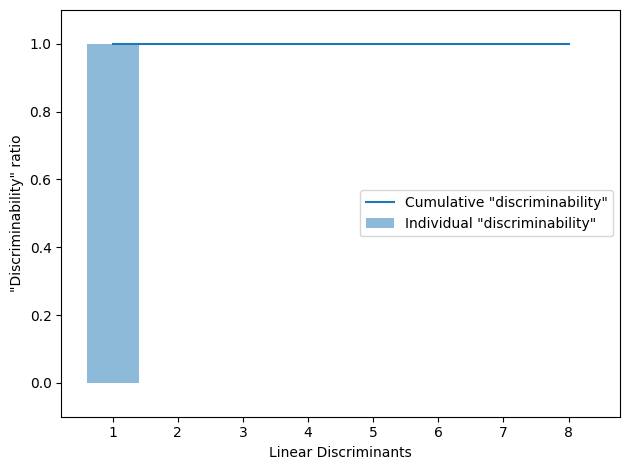

In [12]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 9), discr, alpha=0.5, align='center',label='Individual "discriminability"')
plt.step(range(1, 9), cum_discr, where='mid',label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.078 -0.999]
 [-0.471  0.026]
 [-0.108  0.006]
 [-0.074  0.004]
 [-0.066  0.004]
 [-0.249  0.014]
 [-0.684  0.037]
 [-0.469  0.026]]


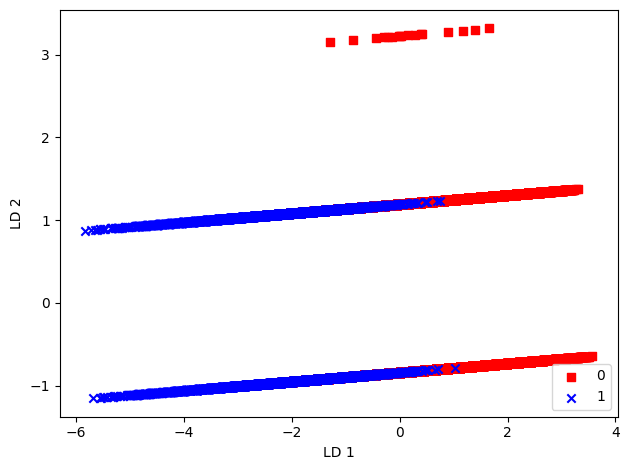

In [22]:
X_train_lda = X_train_std.dot(w)
colors = ['r','b']
markers = ['s', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
 plt.scatter(X_train_lda[y_train==l, 0],
 X_train_lda[y_train==l, 1] * (-1),
 c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [25]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 #setup marker generator and color map
 markers = ( 'x', 's')
 colors = ('blue', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot examples by class
 for idx, cl in enumerate(np.unique(y)):
   plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

<ipython-input-25-4150e6244344>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


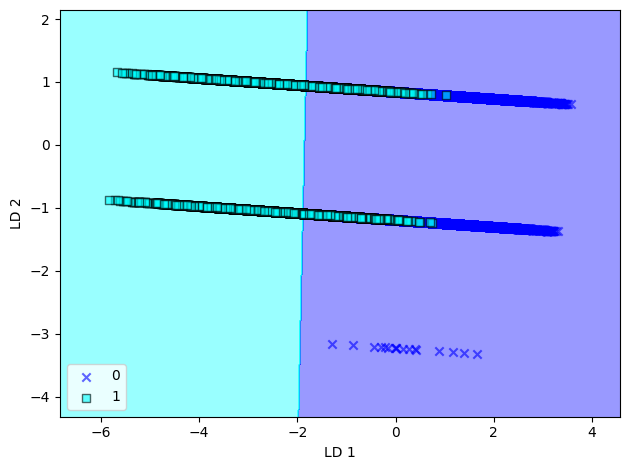

In [26]:
lr = LogisticRegression(random_state=1,solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<ipython-input-25-4150e6244344>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


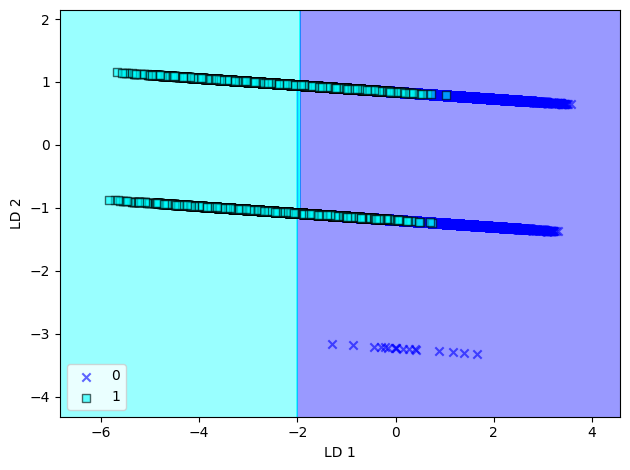

In [27]:
from xgboost import XGBClassifier
lr = XGBClassifier( n_estimators=500,random_state=0, learning_rate=0.01)
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<ipython-input-15-96201c180a43>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


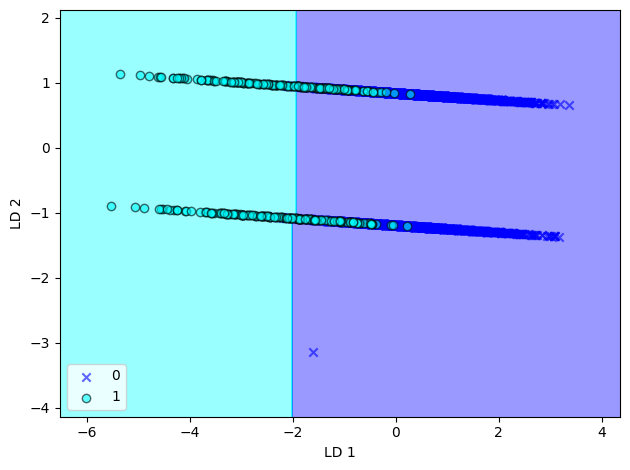

In [18]:
X_test_lda = X_test_std.dot(w)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()